<a href="https://colab.research.google.com/github/KiranTanwani/Machine-Learning/blob/main/LHC_Parkinsons_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINK for the dataset : https://archive.ics.uci.edu/ml/datasets/parkinsons
1. Analyse the dataset as per your own understanding
2. Perform the classification technique to determine the status of healthy and disease’s class
3. Perform the dimensionality reduction technique and observe the accuracy graph w.r.t the 
number of dimensions.
[For testing purpose, you may split the data in the form of 80%-20% as training and testing 
data respectively.

In [1]:
import numpy as np  #helps in mathematical operations
import matplotlib.pyplot as plt #helps in plotting of graph
import pandas as pd #helps in making dataframes and importing csv files

In [2]:
from google.colab import drive #to import google drive data

In [3]:
drive.mount('/content/drive') # mount the drive on colab using authentication

Mounted at /content/drive


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Long Hour Coding"

/content/drive/My Drive/Colab Notebooks/Long Hour Coding


In [5]:
dataset = pd.read_csv("parkinsons.txt")

In [6]:
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
dataset.shape

(195, 24)

In [8]:
df1=dataset.pop('status') 
dataset['status'] = df1

In [22]:
dataset = pd.DataFrame(dataset)
dataset = dataset.drop(['name'],axis=1)

In [9]:
import seaborn as sns # helps in data visualization

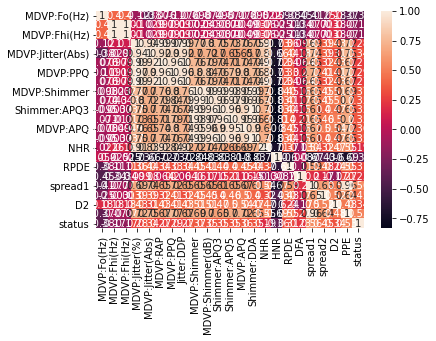

In [11]:
sns.heatmap(dataset[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE','status']].corr(), annot=True)
plt.show()

In [35]:
X = dataset.drop("status",axis=1)
Y = dataset["status"]

In [12]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
scaler_data = scaler.transform(X)

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca=PCA(n_components=2)

In [40]:
pca.fit(scaler_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [41]:
x_pca=pca.transform(scaler_data)

In [42]:
from sklearn import metrics

In [44]:
from sklearn.model_selection import train_test_split

156
39


In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
accuracy = []
for i in range(2,21):
  pca=PCA(n_components=i)
  pca.fit(scaler_data)
  x_pca=pca.transform(scaler_data)

  X_train, X_test, y_train,  y_test = train_test_split(x_pca, Y,train_size=0.8, test_size=0.2, random_state=42)

  knn_5 = KNeighborsClassifier(n_neighbors=5)
  knn_5.fit(X_train,y_train)
  prediction_model_5 = knn_5.predict(X_test)
  #Calculating confusion matrix
  conf_matrix = metrics.confusion_matrix(y_test,prediction_model_5)
  print(conf_matrix)
  #Calculating the accuracy, precision and recall of the model
  print("Accuracy of the model is:",metrics.accuracy_score(y_test, prediction_model_5))
  print("Precision of the model is:",metrics.precision_score(y_test, prediction_model_5))
  print("Recall of the model is:",metrics.recall_score(y_test, prediction_model_5))

  accuracy.append(metrics.accuracy_score(y_test, prediction_model_5))

print(accuracy)

[[ 5  2]
 [ 2 30]]
Accuracy of the model is: 0.8974358974358975
Precision of the model is: 0.9375
Recall of the model is: 0.9375
[[ 6  1]
 [ 2 30]]
Accuracy of the model is: 0.9230769230769231
Precision of the model is: 0.967741935483871
Recall of the model is: 0.9375
[[ 6  1]
 [ 4 28]]
Accuracy of the model is: 0.8717948717948718
Precision of the model is: 0.9655172413793104
Recall of the model is: 0.875
[[ 5  2]
 [ 0 32]]
Accuracy of the model is: 0.9487179487179487
Precision of the model is: 0.9411764705882353
Recall of the model is: 1.0
[[ 5  2]
 [ 1 31]]
Accuracy of the model is: 0.9230769230769231
Precision of the model is: 0.9393939393939394
Recall of the model is: 0.96875
[[ 5  2]
 [ 0 32]]
Accuracy of the model is: 0.9487179487179487
Precision of the model is: 0.9411764705882353
Recall of the model is: 1.0
[[ 5  2]
 [ 0 32]]
Accuracy of the model is: 0.9487179487179487
Precision of the model is: 0.9411764705882353
Recall of the model is: 1.0
[[ 5  2]
 [ 0 32]]
Accuracy of the 

Text(0.5, 1.0, 'Dimensions v/s Accuracy')

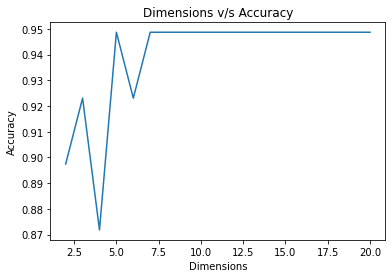

In [54]:
dimensions = np.array(range(2,21))
plt.plot(dimensions,accuracy)
plt.xlabel("Dimensions")
plt.ylabel("Accuracy")
plt.title("Dimensions v/s Accuracy")